In [1]:
import pandas as pd 
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

In [325]:
link = "./dataset/data.csv"
data = pd.read_csv(link)
data.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2015-01-31,2015-02-28,...,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2786.750270,2804.407379,...,3603.409992,3617.149037,3633.357330,3646.515818,3657.414580,3662.689281,3660.470782,3653.666151,3645.766128,3643.197805
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,1950.504004,1961.269364,...,2914.678405,2920.448619,2928.508166,2934.606339,2940.599317,2936.219235,2932.364239,2924.445192,2918.326719,2911.791748
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,1250.903942,1253.980424,...,1580.805695,1588.592125,1595.964302,1600.729398,1603.137187,1603.714145,1602.827176,1602.052953,1600.138096,1601.306067
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,1543.637823,1544.415659,...,1983.089581,1994.092472,2002.819204,2009.039717,2012.642219,2018.627644,2026.645019,2032.714608,2040.503209,2044.828382
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,1030.301927,1033.128051,...,1482.623531,1490.540004,1494.057836,1498.193625,1496.066605,1492.409640,1487.338075,1481.535873,1479.269577,1476.021874


In [326]:
data[data.SizeRank < data.SizeRank.quantile(q=0.3)]

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2015-01-31,2015-02-28,...,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2786.750270,2804.407379,...,3603.409992,3617.149037,3633.357330,3646.515818,3657.414580,3662.689281,3660.470782,3653.666151,3645.766128,3643.197805
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,1950.504004,1961.269364,...,2914.678405,2920.448619,2928.508166,2934.606339,2940.599317,2936.219235,2932.364239,2924.445192,2918.326719,2911.791748
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,1250.903942,1253.980424,...,1580.805695,1588.592125,1595.964302,1600.729398,1603.137187,1603.714145,1602.827176,1602.052953,1600.138096,1601.306067
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,1543.637823,1544.415659,...,1983.089581,1994.092472,2002.819204,2009.039717,2012.642219,2018.627644,2026.645019,2032.714608,2040.503209,2044.828382
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,1030.301927,1033.128051,...,1482.623531,1490.540004,1494.057836,1498.193625,1496.066605,1492.409640,1487.338075,1481.535873,1479.269577,1476.021874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,38134,999,Danville,city,CA,CA,"San Francisco-Oakland-Berkeley, CA",Contra Costa County,NaN,NaN,...,4614.877308,4667.397715,4675.932291,4698.750614,4701.649871,4647.973509,4648.836215,4626.130446,4697.966486,4727.597148
979,7962,1000,Wilson,city,NC,NC,"Wilson, NC",Wilson County,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1309.050010,1322.159848,1335.556543,1350.526015,1370.000000
980,33258,1001,Ormond Beach,city,FL,FL,"Deltona-Daytona Beach-Ormond Beach, FL",Volusia County,1143.766132,1150.210872,...,2306.563527,2343.590977,2333.211673,2336.873114,2329.490824,2323.966043,2330.022379,2328.980361,2336.499857,2302.226852
981,6855,1002,Royal Oak,city,MI,MI,"Detroit-Warren-Dearborn, MI",Oakland County,1254.007221,1279.753765,...,1838.994990,1846.678617,1865.484183,1876.303118,1882.326626,1873.080378,1865.780293,1878.774417,1887.938490,1902.830247


Splitting the hoboken section of the dataset

In [327]:
data[data.RegionName == 'Hoboken'].isnull().sum()

RegionID      0
SizeRank      0
RegionName    0
RegionType    0
StateName     0
             ..
2023-05-31    0
2023-06-30    0
2023-07-31    0
2023-08-31    0
2023-09-30    0
Length: 113, dtype: int64

In [328]:
hoboken = data[data.RegionName == 'Hoboken']
hoboken.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2015-01-31,2015-02-28,...,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30
951,25146,970,Hoboken,city,NJ,NJ,"New York-Newark-Jersey City, NY-NJ-PA",Hudson County,2798.930748,2824.11029,...,3594.12511,3604.155197,3620.456072,3640.444824,3672.38624,3684.714197,3685.954206,3685.266105,3702.169303,3721.330215


In [329]:
hoboken = pd.melt(
    hoboken.iloc[:,8::],
    value_name= 'Value',
    var_name= 'Date'
) 
hoboken.Date = pd.to_datetime(hoboken.Date)
hoboken.head()

,Date,Value
0,2015-01-31,2798.930748
1,2015-02-28,2824.110290
2,2015-03-31,2835.532496
3,2015-04-30,2844.208502
4,2015-05-31,2860.368254


In [330]:
hoboken.isnull().sum()

Date     0
Value    0
dtype: int64

In [331]:
hoboken.Date.dt.year

0      2015
1      2015
2      2015
3      2015
4      2015
       ... 
100    2023
101    2023
102    2023
103    2023
104    2023
Name: Date, Length: 105, dtype: int32

In [332]:
hoboken[hoboken.Date.dt.year >= 2022]

,Date,Value
84,2022-01-31,3244.861205
85,2022-02-28,3292.294713
86,2022-03-31,3328.970839
87,2022-04-30,3359.422286
88,2022-05-31,3396.577094
89,2022-06-30,3441.961922
90,2022-07-31,3487.732020
91,2022-08-31,3505.409732
92,2022-09-30,3520.136149
93,2022-10-31,3541.269283


In [333]:
hoboken

,Date,Value
0,2015-01-31,2798.930748
1,2015-02-28,2824.110290
2,2015-03-31,2835.532496
3,2015-04-30,2844.208502
4,2015-05-31,2860.368254
...,...,...
100,2023-05-31,3684.714197
101,2023-06-30,3685.954206
102,2023-07-31,3685.266105
103,2023-08-31,3702.169303


In [334]:
hoboken[hoboken.Date.dt.year == 2023]

,Date,Value
96,2023-01-31,3604.155197
97,2023-02-28,3620.456072
98,2023-03-31,3640.444824
99,2023-04-30,3672.386240
100,2023-05-31,3684.714197
101,2023-06-30,3685.954206
102,2023-07-31,3685.266105
103,2023-08-31,3702.169303
104,2023-09-30,3721.330215


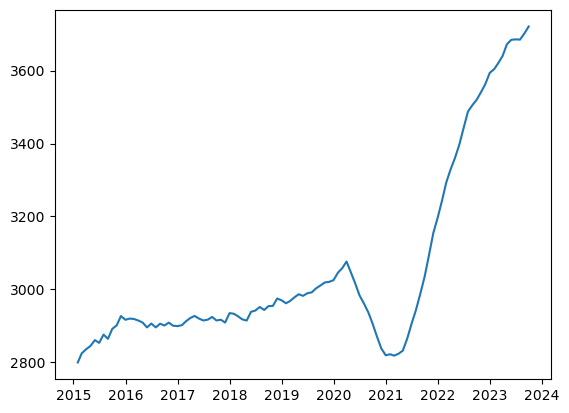

In [335]:
plt.plot(hoboken.Date,hoboken.Value)

Saving the hoboken file to a seperate CSV to use it on future mdoels 

In [23]:
# saving hoboken into a seperate file 
save_link = './dataset/hoboken.csv'
hoboken.to_csv(path_or_buf=save_link, index=False)

In [336]:
hoboken[hoboken.Date.dt.year == 2020]

,Date,Value
60,2020-01-31,3045.674577
61,2020-02-29,3057.453381
62,2020-03-31,3076.003001
63,2020-04-30,3046.637149
64,2020-05-31,3015.744424
65,2020-06-30,2983.172754
66,2020-07-31,2960.880773
67,2020-08-31,2936.254793
68,2020-09-30,2905.229286
69,2020-10-31,2869.415788


In [337]:
new_york = data[data.SizeRank == 0]

In [338]:
new_york = pd.melt(
    new_york.iloc[:,8::],
    value_name= 'Value',
    var_name= 'Date'
)
new_york

,Date,Value
0,2015-01-31,2786.750270
1,2015-02-28,2804.407379
2,2015-03-31,2817.752756
3,2015-04-30,2832.771956
4,2015-05-31,2839.597064
...,...,...
100,2023-05-31,3662.689281
101,2023-06-30,3660.470782
102,2023-07-31,3653.666151
103,2023-08-31,3645.766128


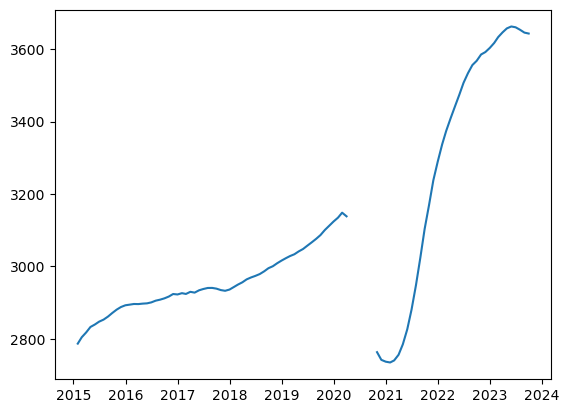

In [339]:
new_york.Date = pd.to_datetime(new_york.Date)
plt.plot(new_york.Date,new_york.Value)

# handling new york null values 

In [340]:
new_york.isnull().sum()

Date     0
Value    6
dtype: int64

In [341]:
null_values = new_york[new_york['Value'].isnull()]
new_york.set_index('Date', inplace=True)
if not null_values.empty:
    new_york.Value = new_york.Value.interpolate(method='time')
new_york

,Value
Date,
2015-01-31,2786.750270
2015-02-28,2804.407379
2015-03-31,2817.752756
2015-04-30,2832.771956
2015-05-31,2839.597064
...,...
2023-05-31,3662.689281
2023-06-30,3660.470782
2023-07-31,3653.666151


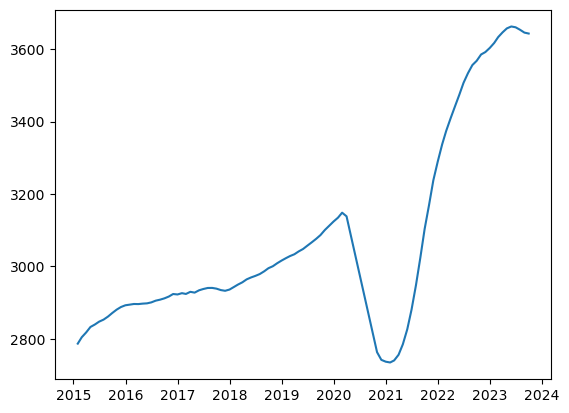

In [342]:
plt.plot(new_york.index,new_york.Value)

In [22]:
new_york.reset_index(inplace=True)
save_link = './dataset/new york.csv'
new_york.to_csv(path_or_buf=save_link, index=False)

# proper analysis of hoboken 

checking for seasonality and trend looks like there is no real seasonality and the trend is upwards plotting only 2 years of data to see if there is seasonality 

In [343]:
hoboken[hoboken.Date.dt.year < 2017]

,Date,Value
0,2015-01-31,2798.930748
1,2015-02-28,2824.110290
2,2015-03-31,2835.532496
3,2015-04-30,2844.208502
4,2015-05-31,2860.368254
5,2015-06-30,2852.749853
6,2015-07-31,2875.479398
7,2015-08-31,2863.854055
8,2015-09-30,2891.137218
9,2015-10-31,2900.716432


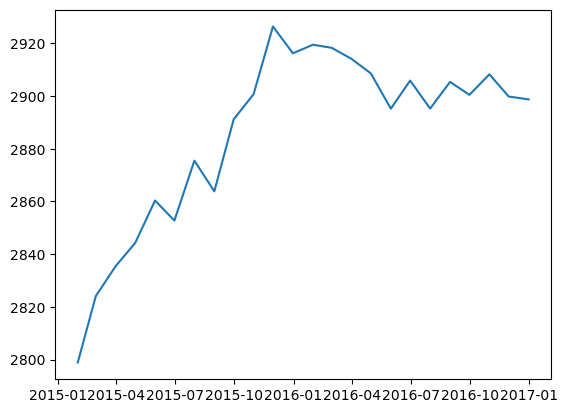

In [344]:
# 2015 - 2017
plt.plot(
    hoboken[hoboken.Date.dt.year < 2017].Date, 
    hoboken[hoboken.Date.dt.year < 2017].Value
)

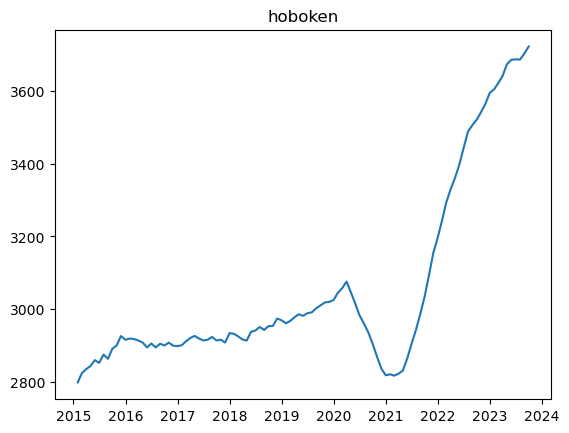

In [365]:
# 2016 - 2018
plt.title('hoboken')
plt.plot(hoboken.Date, hoboken.Value)

There could be multiplicative seasonality, or additive seasonality, or none at all. We will use seasonal_decompose to determine this 

In [346]:
# checking for seasonality 
# converting date to index 
hoboken.set_index('Date', inplace=True)

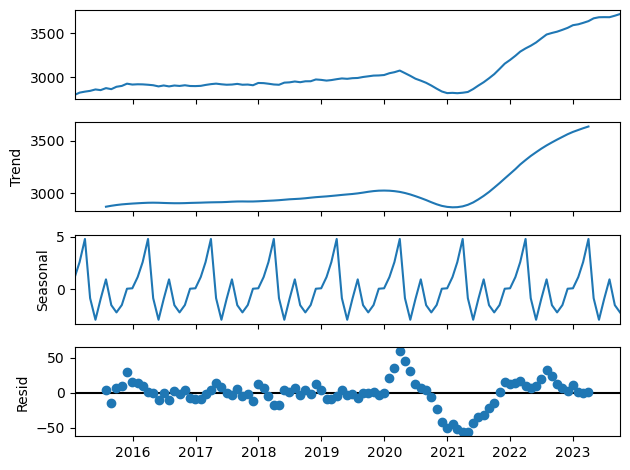

In [347]:
# checking for additive seasonality
decompose_result = seasonal_decompose(hoboken, model= 'additive')
decompose_result.plot();

There is additive seasonality. A sarima model would work much better then, where we need to ensure that model can take care of seasonality and trend.   

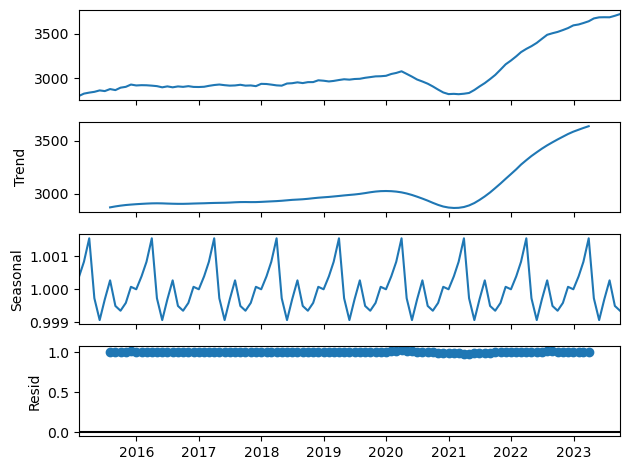

In [348]:
# checking for Multiplicative seasoanlity 
decompose_result = seasonal_decompose(hoboken, model= 'multiplicative')
decompose_result.plot();

There is additive seasonality but the complexity of the dataset is too mcuh for the naive decomposition of seasonal_decompose. 

In [349]:
hoboken = hoboken.reset_index().rename(columns={'index':'Date'})
hoboken

,Date,Value
0,2015-01-31,2798.930748
1,2015-02-28,2824.110290
2,2015-03-31,2835.532496
3,2015-04-30,2844.208502
4,2015-05-31,2860.368254
...,...,...
100,2023-05-31,3684.714197
101,2023-06-30,3685.954206
102,2023-07-31,3685.266105
103,2023-08-31,3702.169303


# retreiving information for philly 

In [350]:
philly = data[data.SizeRank == 5]

In [351]:
philly

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2015-01-31,2015-02-28,...,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30
5,13271,5,Philadelphia,city,PA,PA,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD",Philadelphia County,1250.824319,1253.653977,...,1669.204867,1674.03144,1678.51356,1685.280553,1687.328941,1687.376612,1686.696219,1688.490365,1691.102022,1693.991887


In [352]:
philly = data[data.SizeRank == 5]
philly = pd.melt(
    philly.iloc[:,8::],
    value_name= 'Value',
    var_name= 'Date'
)
philly.Date = pd.to_datetime(philly.Date)

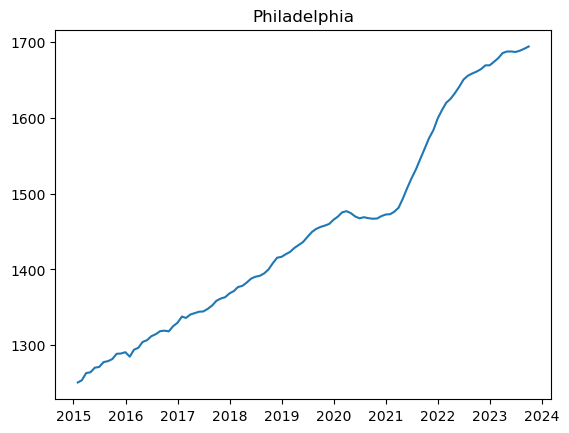

In [368]:
plt.title('Philadelphia')
plt.plot(philly)

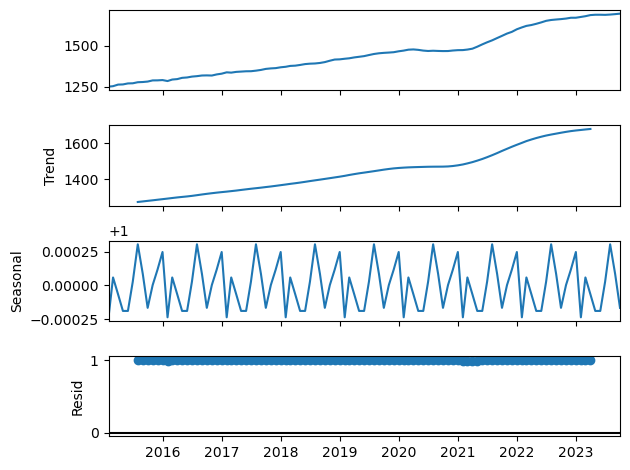

In [353]:
philly.set_index('Date', inplace=True)
decompose_result = seasonal_decompose(philly, model= 'multiplicative')
decompose_result.plot();

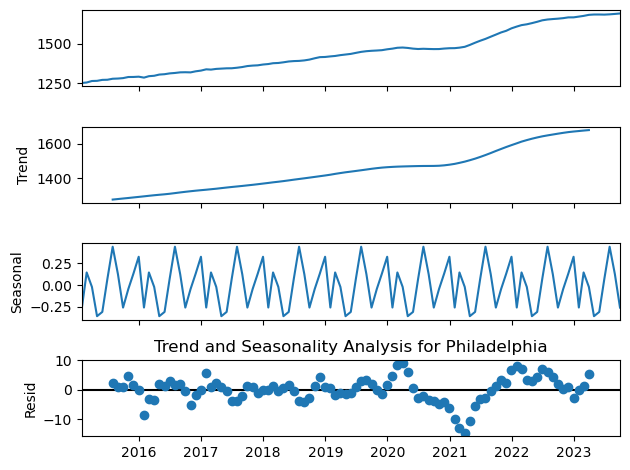

In [354]:
decompose_result = seasonal_decompose(philly, model= 'additive')
decompose_result.plot();
plt.title("Trend and Seasonality Analysis for Philadelphia")
plt.tight_layout()
plt.show()

# Analysis of New york dataset

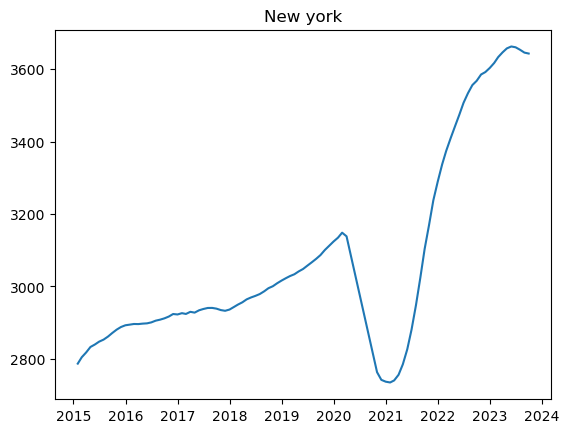

In [366]:
plt.title('New york')
plt.plot(new_york)

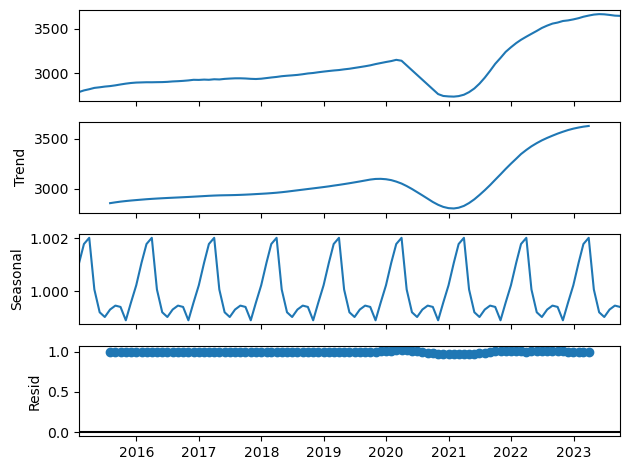

In [356]:
decompose_result = seasonal_decompose(new_york, model= 'multiplicative')
decompose_result.plot();

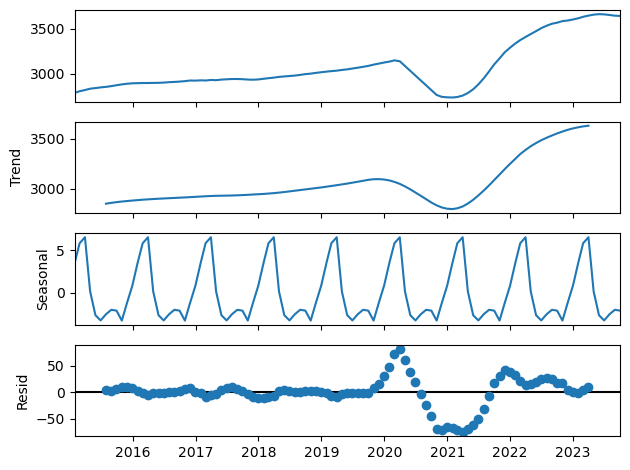

In [357]:
decompose_result = seasonal_decompose(new_york, model= 'additive')
decompose_result.plot();

# PACF FOR DATASETS

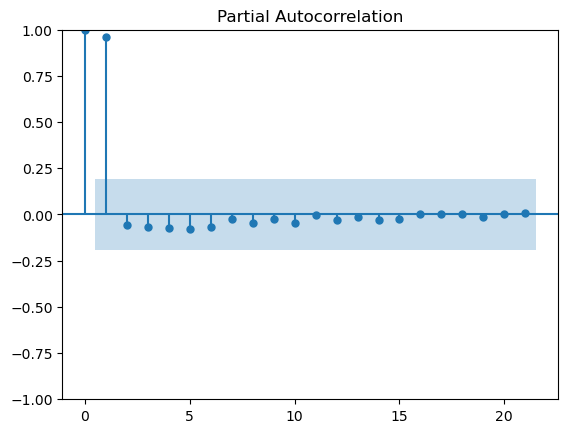

In [362]:
plot_pacf(hoboken.Value);

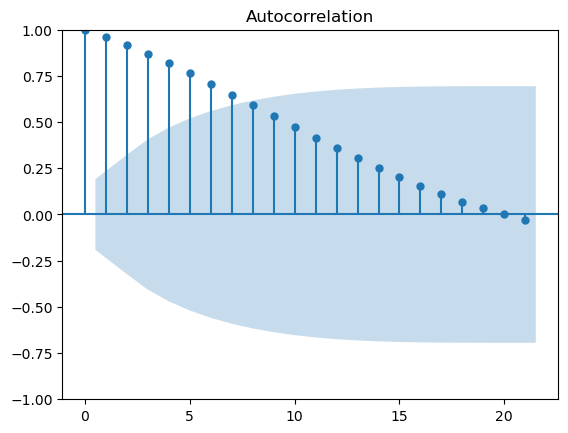

In [363]:
plot_acf(hoboken.Value);

In [ ]:
plot_pacf(hoboken);

In [ ]:
plot_acf(new_york);

In [ ]:
plot_pacf(new_york);

# PHILLY DATASET

In [321]:
philly = data[data.SizeRank == 5]
philly = pd.melt(
    philly.iloc[:,8::],
    value_name= 'Value',
    var_name= 'Date'
)
philly.Date = pd.to_datetime(philly.Date)

In [323]:
philly.isnull().sum()

Date     0
Value    0
dtype: int64

In [324]:
philly.to_csv(path_or_buf='./dataset/philly.csv', index=False)